In [1]:
from doubleAgent import DoubleAgent
from policy import Policy
from memory import Memory
from qNetwork import QNetwork

import os
import torch
import gymnasium as gym
from torch import nn

In [2]:
# Policy data
START_EPSILON = 1
DECAY = 0.98
FINAL_EPSILON = 0.01

# Memory data
MEMORY_SIZE = 3_000

# Training settings
NUMBER_OF_EPISODES = 50
DISCOUNT_GAMMA = 0.99
MEMORY_BATCH_SIZE_PER_TRAINING_STEP = 64
NEURAL_NETWORK_BATCH_SIZE = 1
STEP_LIMIT_PER_RUN = 2_000
LOSS_FUNCTION = nn.MSELoss()
OPTIMIZER = torch.optim.Adam
NN_SEED = 42

In [3]:
def train(agent):
    env = gym.make("LunarLander-v2")
    agent.train(
        environment=env,
        n_episodes=NUMBER_OF_EPISODES,
        gamma=DISCOUNT_GAMMA,
        memory_batch_size=MEMORY_BATCH_SIZE_PER_TRAINING_STEP,
        batch_size=NEURAL_NETWORK_BATCH_SIZE,
        steps_limit=STEP_LIMIT_PER_RUN,
        loss_fn=LOSS_FUNCTION,
        optimizer=OPTIMIZER,
        seed=NN_SEED,
        )
    agent.policy.save(f"saved_models/after_{NUMBER_OF_EPISODES}-eps_{MEMORY_BATCH_SIZE_PER_TRAINING_STEP}-Mbsz_{NEURAL_NETWORK_BATCH_SIZE}-bsz")
    env.close()

Using cpu device

Using cpu device



100%|██████████| 50/50 [18:17<00:00, 21.94s/it, current reward=-84.2, current epsilon=0.364]


Done training. Final epsilon = 0.3641696800871167


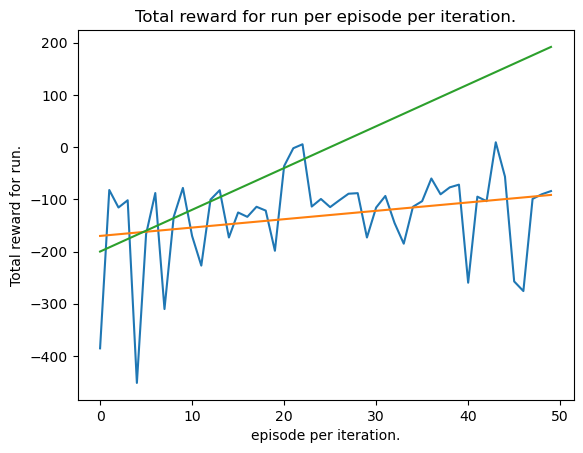

In [4]:
policy = Policy(network=QNetwork(), epsilon=START_EPSILON, decay=DECAY)
targetPolicy = Policy(network=QNetwork(), epsilon=START_EPSILON, decay=DECAY)

memory = Memory(max_size=MEMORY_SIZE)

agent = DoubleAgent(policy=policy, memory=memory, target_policy=targetPolicy, tau=0.1)

if os.path.exists(f"saved_models/after_{NUMBER_OF_EPISODES}-eps_{MEMORY_BATCH_SIZE_PER_TRAINING_STEP}-Mbsz_{NEURAL_NETWORK_BATCH_SIZE}-bsz"):
    output = input("You seem to have already trained this model before, want to train it again?\n\t[y]/n?")
    if output in ["yes", "Yes", 'y', 'Y', '']:
        train(agent)
    else:
        exit()
else:
    train(agent)

print(f"Done training. Final epsilon = {agent.policy.epsilon}")
agent.plot()